In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

from sklearn.model_selection import cross_val_predict, cross_val_score, KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Preparacao dos dados

In [2]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste =pickle.load(f)

In [3]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [4]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [5]:
# como faremos a selecao ods parametros por KFold, vamos juntar as bass
x_credit = np.concatenate((x_credit_treinamento, x_credit_teste), axis=0)
x_credit.shape

(2000, 3)

In [6]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste),axis=0 )
y_credit.shape

(2000,)

## Validação Cruzada

In [7]:
#  a cada ve que se executa uma validação cruzada, há 10 KFolds (amostras)

In [8]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30): # logo, serão 300 testes (10*30)
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

## arvores
    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best') # criterios conhecidos no ajuste dos parametros
    scores = cross_val_score(arvore, x_credit, y_credit, cv=kfold)

    # print(scores)
    # print(scores.mean())
    resultados_arvore.append(scores.mean())

## Random Forest
    random_forest = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best') # criterios conhecidos no ajuste dos parametros
    scores = cross_val_score(random_forest, x_credit, y_credit, cv=kfold)

    resultados_random_forest.append(scores.mean())

## KNN
    knn = KNeighborsClassifier()
    scores = cross_val_score(random_forest, x_credit, y_credit, cv=kfold)
    resultados_knn.append(scores.mean())

## Logistica
    logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
    scores = cross_val_score(logistica, x_credit, y_credit, cv=kfold)
    resultados_logistica.append(scores.mean())

## SVM
    svm = SVC(kernel='rbf', C=2.0)
    scores = cross_val_score(svm, x_credit, y_credit, cv=kfold)
    resultados_svm.append(scores.mean())

## Redes Neurais
# não vou rodar pra não ficar muito pesado, mas a ideia é a mesma


In [9]:
# média de cada linha dos resultados -- print(scores)
print('arvore:')
resultados_arvore

arvore:


[0.9869999999999999,
 0.9844999999999999,
 0.9905000000000002,
 0.9875,
 0.9890000000000001,
 0.9884999999999999,
 0.9880000000000001,
 0.9875,
 0.9860000000000001,
 0.9869999999999999,
 0.9865,
 0.9894999999999999,
 0.9889999999999999,
 0.9869999999999999,
 0.984,
 0.9854999999999998,
 0.9855,
 0.9904999999999999,
 0.9875,
 0.9869999999999999,
 0.983,
 0.9865,
 0.9884999999999999,
 0.9875,
 0.9880000000000001,
 0.9880000000000001,
 0.9879999999999999,
 0.986,
 0.986,
 0.9884999999999999]

In [10]:
print('Random Forest:')
resultados_random_forest

Random Forest:


[0.986,
 0.9844999999999999,
 0.9905000000000002,
 0.9879999999999999,
 0.9884999999999999,
 0.9884999999999999,
 0.9880000000000001,
 0.9875,
 0.9855,
 0.9869999999999999,
 0.9860000000000001,
 0.9894999999999999,
 0.9884999999999999,
 0.9869999999999999,
 0.9845,
 0.9859999999999998,
 0.9855,
 0.9904999999999999,
 0.9875,
 0.9869999999999999,
 0.985,
 0.9865,
 0.9884999999999999,
 0.9875,
 0.9880000000000001,
 0.9880000000000001,
 0.9879999999999999,
 0.986,
 0.9854999999999998,
 0.9884999999999999]

In [11]:
print('KNN:')
resultados_knn

KNN:


[0.9869999999999999,
 0.985,
 0.9905000000000002,
 0.9869999999999999,
 0.9884999999999999,
 0.9890000000000001,
 0.9884999999999999,
 0.9875,
 0.9870000000000001,
 0.9875,
 0.9860000000000001,
 0.9894999999999999,
 0.9884999999999999,
 0.9869999999999999,
 0.9845,
 0.9859999999999998,
 0.9855,
 0.9904999999999999,
 0.9875,
 0.9869999999999999,
 0.983,
 0.9865,
 0.9884999999999999,
 0.9875,
 0.9880000000000001,
 0.9880000000000001,
 0.9879999999999999,
 0.9855,
 0.9864999999999998,
 0.9890000000000001]

In [12]:
print('Regressão Logística:')
resultados_logistica

Regressão Logística:


[0.9475,
 0.9465,
 0.9470000000000001,
 0.946,
 0.9465,
 0.9465,
 0.9469999999999998,
 0.9480000000000001,
 0.9465,
 0.9465,
 0.9475,
 0.9479999999999998,
 0.9475,
 0.9475,
 0.9484999999999999,
 0.9475,
 0.946,
 0.9470000000000001,
 0.9465,
 0.9464999999999998,
 0.9465,
 0.9469999999999998,
 0.9455,
 0.9465,
 0.9470000000000001,
 0.9469999999999998,
 0.9475,
 0.9465,
 0.9480000000000001,
 0.9465]

In [13]:

print('SVM:')
resultados_svm

SVM:


[0.9845,
 0.984,
 0.9864999999999998,
 0.985,
 0.985,
 0.9845,
 0.986,
 0.9849999999999998,
 0.984,
 0.9845,
 0.984,
 0.9845,
 0.9855,
 0.9855,
 0.983,
 0.9865,
 0.986,
 0.9865,
 0.985,
 0.9844999999999999,
 0.984,
 0.985,
 0.9865,
 0.9875,
 0.9869999999999999,
 0.982,
 0.984,
 0.9865,
 0.9834999999999999,
 0.9865]

#### Avaliando os resultados

In [34]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random Forest': resultados_random_forest, 'KNN': resultados_knn,
                          'Logistica': resultados_logistica, 'SVM': resultados_svm})

In [35]:
resultados

,Arvore,Random Forest,KNN,Logistica,SVM
0,0.9870,0.9860,0.9870,0.9475,0.9845
1,0.9845,0.9845,0.9850,0.9465,0.9840
2,0.9905,0.9905,0.9905,0.9470,0.9865
3,0.9875,0.9880,0.9870,0.9460,0.9850
4,0.9890,0.9885,0.9885,0.9465,0.9850
5,0.9885,0.9885,0.9890,0.9465,0.9845
6,0.9880,0.9880,0.9885,0.9470,0.9860
7,0.9875,0.9875,0.9875,0.9480,0.9850
8,0.9860,0.9855,0.9870,0.9465,0.9840
9,0.9870,0.9870,0.9875,0.9465,0.9845


### Testes estatísticos

In [36]:
# Estatística descritiva
resultados.describe()

,Arvore,Random Forest,KNN,Logistica,SVM
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987250,0.987250,0.987333,0.946950,0.985083
std,0.001741,0.001591,0.001678,0.000687,0.001280
min,0.983000,0.984500,0.983000,0.945500,0.982000
25%,0.986125,0.986000,0.986500,0.946500,0.984125
50%,0.987500,0.987500,0.987500,0.947000,0.985000
75%,0.988375,0.988375,0.988500,0.947500,0.986375
max,0.990500,0.990500,0.990500,0.948500,0.987500


In [37]:
# Coeficiente de variação
cv = resultados.std() / resultados.mean() * 100
cv

Arvore           0.176322
Random Forest    0.161119
KNN              0.169965
Logistica        0.072517
SVM              0.129977
dtype: float64

In [38]:
# Variância
resultados.var()

Arvore           3.030172e-06
Random Forest    2.530172e-06
KNN              2.816092e-06
Logistica        4.715517e-07
SVM              1.639368e-06
dtype: float64

In [39]:
# Testes de normalidade
# Shapiro
from scipy.stats import shapiro

alpha = 0.05

shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm)

# Se pvalue for <= a alpha, indica que os dados NÃO são normais
# Logo, aceitamos a hipótese nula de que os dados são normais

(ShapiroResult(statistic=0.9769608974456787, pvalue=0.740291178226471),
 ShapiroResult(statistic=0.9604780077934265, pvalue=0.3185953199863434),
 ShapiroResult(statistic=0.9780791997909546, pvalue=0.7725057005882263),
 ShapiroResult(statistic=0.9370993375778198, pvalue=0.07600117474794388),
 ShapiroResult(statistic=0.962294340133667, pvalue=0.35407164692878723))

/Users/fernandovieira/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

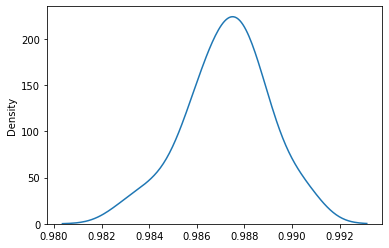

In [40]:
# Testes de hipótese com ANOVA e Tukey
sns.distplot(resultados_arvore, hist=False, kde=True)

/Users/fernandovieira/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

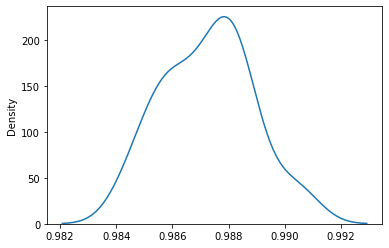

In [41]:
sns.distplot(resultados_random_forest, hist=False, kde=True)

/Users/fernandovieira/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

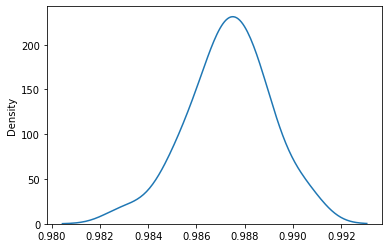

In [42]:
sns.distplot(resultados_knn, hist=False, kde=True)

/Users/fernandovieira/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

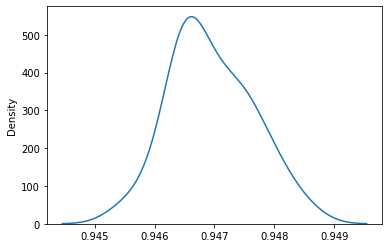

In [43]:
sns.distplot(resultados_logistica, hist=False, kde=True)

/Users/fernandovieira/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

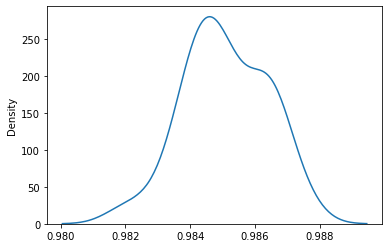

In [44]:
sns.distplot(resultados_svm, hist=False, kde=True)

**Melhor algoritmo com ANOVA e Tukey**

In [45]:
# Teste ANOVA auxiliará a decidir se os resultados são diferentes, em se tratando daqueles com distribuições normais
from scipy.stats import f_oneway

In [46]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm) # 0 '_' é para pegar apenas o reusltado de p
p

3.383593589279315e-151

In [47]:
alpha = 0.05 # confiança de 95%

if p <= alpha:
    print('Hipótese nula rejeitada: dados são diferentes')
else:
    print('Hipótese alternativa rejeitada: resultados são iguais') # ex.: arvore é diferete de knn, svm é diferente de random forest etc.

# como os dados são diferentes, vamos aplicar o teste de Tukey


Hipótese nula rejeitada: dados são diferentes


In [48]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm]),
                         'algoritmo':['arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                                      'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest', 'random forest',
                                      'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn',
                                      'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica',
                                      'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm']}

resultados_df = pd.DataFrame(resultados_algoritmos)

In [49]:
resultados_df.head(), resultados_df.tail()

(   accuracy algoritmo
 0    0.9870    arvore
 1    0.9845    arvore
 2    0.9905    arvore
 3    0.9875    arvore
 4    0.9890    arvore,
      accuracy algoritmo
 145    0.9820       svm
 146    0.9840       svm
 147    0.9865       svm
 148    0.9835       svm
 149    0.9865       svm)

In [50]:
from statsmodels.stats.multicomp import MultiComparison

In [51]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [52]:
teste_tukey = compara_algoritmos.tukeyhsd()
print(teste_tukey)

# Comparar o alpha de 0.05 com os valores de p-adj. 
# Se p-adj for menor que alpha, rejeitamos a hipotese nula, o que indica que os resultados dos algoritmos são diferentes (coluna reject)
# Se os valores forem maiores que alpha, indica que aceitamos H0 e que os resultados sã diferentes, por exemplo, tanto faz os resultados de arvore ou knn

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
       arvore           knn   0.0001   0.9 -0.0009  0.0011  False
       arvore     logistica  -0.0403 0.001 -0.0413 -0.0393   True
       arvore random forest     -0.0   0.9  -0.001   0.001  False
       arvore           svm  -0.0022 0.001 -0.0032 -0.0011   True
          knn     logistica  -0.0404 0.001 -0.0414 -0.0394   True
          knn random forest  -0.0001   0.9 -0.0011  0.0009  False
          knn           svm  -0.0023 0.001 -0.0033 -0.0012   True
    logistica random forest   0.0403 0.001  0.0393  0.0413   True
    logistica           svm   0.0381 0.001  0.0371  0.0392   True
random forest           svm  -0.0022 0.001 -0.0032 -0.0011   True
-----------------------------------------------------------------


In [57]:
resultados.mean().sort_values(ascending=False)

KNN              0.987333
Arvore           0.987250
Random Forest    0.987250
SVM              0.985083
Logistica        0.946950
dtype: float64

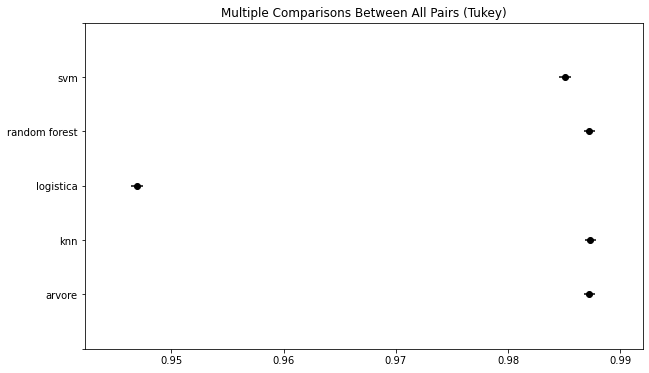

In [58]:
teste_tukey.plot_simultaneous();